In [24]:
# Base para o código:

## Leitura de arquivos e interpertação de dados:
import numpy as np 
import pandas as pd

## Importação e preparação dos arquivos
covid_19 = pd.read_csv(r"\Users\Cauan\Documents\UFV\NIAS-IA-treinamento-2024-2\Cauan\4 - Pandas\COVID-19 Dataset\covid_19_clean_complete.csv", index_col="Date", parse_dates=True)
worldmeter = pd.read_csv(r"\Users\Cauan\Documents\UFV\NIAS-IA-treinamento-2024-2\Cauan\4 - Pandas\COVID-19 Dataset\worldometer_data.csv")

print('Setup completo :)')

Setup completo :)


# 5.1 - Line Chart

### 1. Criar gráfico linechart que indique a progressão no tempo das mortes nas regiões: Américas, Eastern Mediterran e Europe (OBS: Utilize apenas o arquivo “covid_19_clean_complete.csv”)

In [25]:
# a. Importar bibliotecas matplotlib e seaborn, para retirar a necessidade de criar arquivos para os gráficos, digitar comando “%matplotlib inline”;

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings # To suppress some warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

In [26]:
# b. Realizar agrupamento utilizando as colunas “Date” e “WHO Region”, utilizando “sum” como função de agregação;

sel_regions = covid_19.loc[(covid_19['WHO Region'] == 'Europe')|(covid_19['WHO Region'] == 'Eastern Mediterranean')|(covid_19['WHO Region'] == 'Americas')]
                                                                                                                
deaths_data = sel_regions.groupby(['Date', 'WHO Region']).agg({'Deaths':'sum'})

deaths_data.head()

Deaths
Date       WHO Region                   
2020-01-22 Americas                    0
           Eastern Mediterranean       0
           Europe                      0
2020-01-23 Americas                    0
           Eastern Mediterranean       0

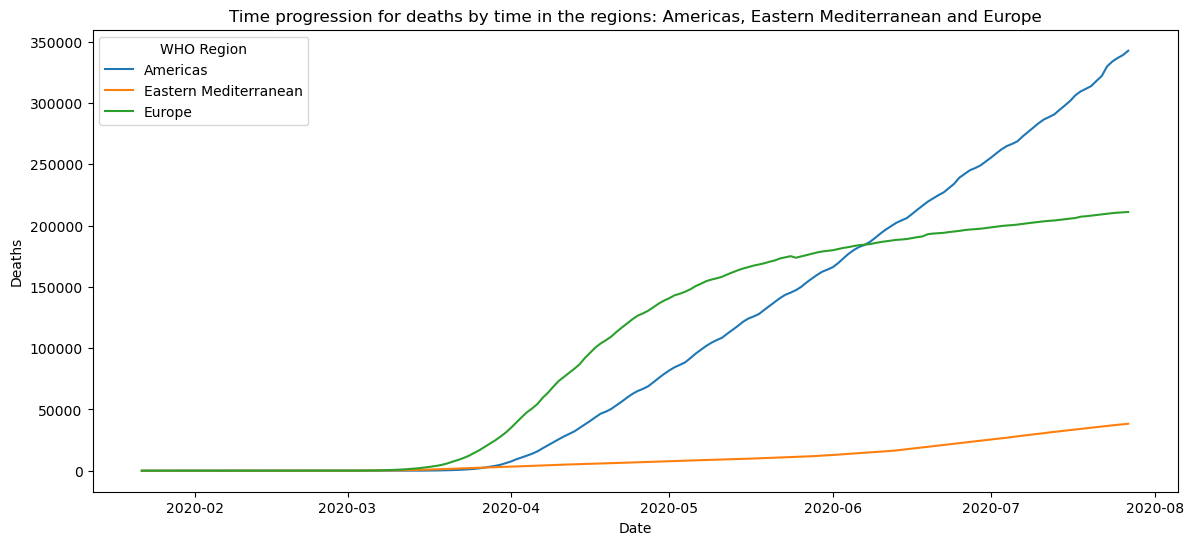

In [32]:
# c. Plotar gráficos que contenham as progressões das regiões exigidas;

plt.figure(figsize=(14,6))

# Adicionar nomes para eixos, título do gráfico, grid e legendas para as linhas:

plt.title('Time progression for deaths by time in the regions: Americas, Eastern Mediterranean and Europe')

sns.lineplot(data=deaths_data, x='Date', y='Deaths', hue='WHO Region')

plt.show()


Analisar gráfico de acordo com as perguntas feitas.

    1 - Europa e Américas
    2 - Em meados de março
    3 - De forma linear para as Américas, logaritmica para a Europa e de forma exponencial, apesar de muito lenta, para o Mediterrâneo Oriental


# 5.2 - Bar Charts

### 1. Agora deve-se produzir um gráfico bar chart, indicando o número de mortes em cada continente (OBS: utilize o dataframe criado no exercício 4.1 - 4)

In [33]:
#Recriando o dataframe do item 4.1 - 4

worldmeter_country = worldmeter.groupby('Country/Region').agg({'Continent':'sum','Population':'sum'})

covid_country = covid_19.groupby(['Country/Region','WHO Region'],as_index=False).agg({'Deaths':'sum'}).set_index('Country/Region')

world_covid = worldmeter_country.join(covid_country.loc[:,['Deaths']])

continentmeter = world_covid.reset_index().groupby('Continent').agg({'Country/Region': ', '.join,'Population':'sum','Deaths':'sum'})

continentmeter

,Country/Region,Population,Deaths
Continent,,,
0,Diamond Princess,0.000000e+00,0.0
Africa,"Algeria, Angola, Benin, Botswana, Burkina Faso...",1.343515e+09,682067.0
Asia,"Afghanistan, Armenia, Azerbaijan, Bahrain, Ban...",3.173656e+09,3882965.0
Australia/Oceania,"Australia, Fiji, French Polynesia, New Caledon...",4.095791e+07,13570.0
Europe,"Albania, Andorra, Austria, Belarus, Belgium, B...",7.476775e+08,14689301.0
North America,"Antigua and Barbuda, Aruba, Bahamas, Barbados,...",5.895035e+08,2666043.0
South America,"Argentina, Bolivia, Brazil, Chile, Colombia, E...",4.311105e+08,5681838.0


In [34]:
# a. Editar o tamanho do gráfico, como sugestão, coloque o tamanho (10,6);

plt.figure(figsize=(10,6))

<Figure size 1000x600 with 0 Axes>

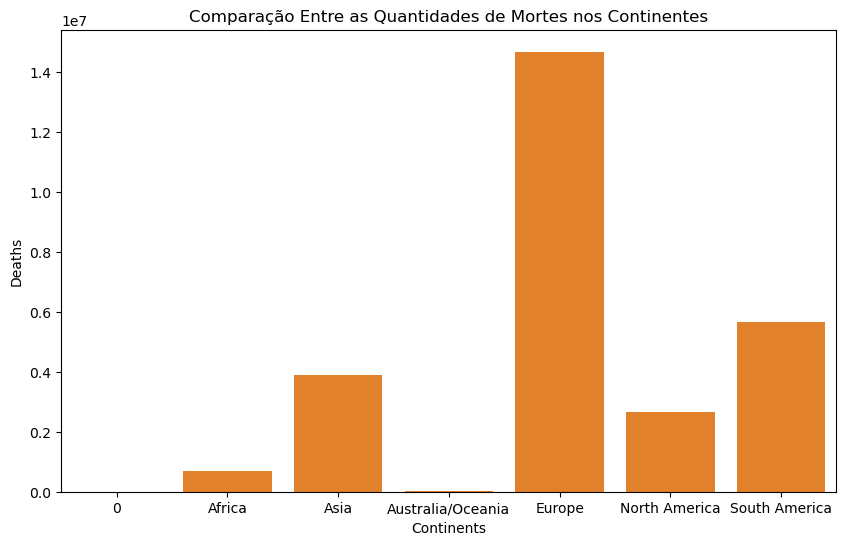

In [36]:
# b. Plotar gráfico bar chart das mortes nos continentes;

plt.title('Comparação Entre as Quantidades de Mortes nos Continentes')

sns.barplot(x=continentmeter.reset_index().Continent,y=continentmeter.reset_index().Deaths)

plt.xlabel('Continents')

plt.show()


Responder perguntas com base no gráfico.

    1 - Europa e América do Sul
    2 - Australia/Oceania
    3 - Europa e América do Sul foi o continente que misturou 3 características que influenciaram muito na reprodução do vírus: ignorância geral quando o vírus primeiro chegou, alta densidade de pessoas e alto fluxo de pessoas. Em contrapartida, Australi/Oceania, se beneficiaram exatamente por características opostas: distanciamento geográfio, maior preoparo da população e baixo fluxo de pessoas.



# 5.3 - Scatter Plots

### 1. Descobrir se há relação entre o número de mortes por milhão e a quantidade de habitantes, nos 3 continentes com maior média de mortes por milhão de habitantes, por meio de scatter plot (OBS: Utilizar somente arquivo “worldometer_data.csv”)

In [39]:
# a. Agrupar o dataframe pela coluna “Continent”, retirar apenas os dados de "Deaths/1 M pop", utilizar “mean” como função de agregação
# e ordenar para descobrir os 3 continentes com maior valor;

top_3 = worldmeter.groupby('Continent').agg({'Deaths/1M pop':'mean'}).sort_values(by='Deaths/1M pop', ascending=False).iloc[0:3]

top_3

,Deaths/1M pop
Continent,
South America,216.769231
Europe,214.955556
North America,110.607143


In [41]:
# b. Obter apenas os dados do dataframe, correspondentes a esses continentes;

top_3_data = worldmeter.reset_index().loc[worldmeter.reset_index().Continent.isin(top_3.index)]

top_3_data

,index,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,0,USA,North America,331198130.0,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,1,Brazil,South America,212710692.0,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
3,3,Russia,Europe,145940924.0,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
5,5,Mexico,North America,129066160.0,462690,6590.0,50517.0,819.0,308848.0,4140.0,103325.0,3987.0,3585.0,391.0,1056915.0,8189.0,Americas
6,6,Peru,South America,33016319.0,455409,NaN,20424.0,NaN,310337.0,NaN,124648.0,1426.0,13793.0,619.0,2493429.0,75521.0,Americas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,203,Greenland,North America,56780.0,14,NaN,NaN,NaN,14.0,NaN,0.0,NaN,247.0,NaN,5977.0,105266.0,Europe
204,204,Montserrat,North America,4992.0,13,NaN,1.0,NaN,10.0,NaN,2.0,NaN,2604.0,200.0,61.0,12220.0,NaN
205,205,Caribbean Netherlands,North America,26247.0,13,NaN,NaN,NaN,7.0,NaN,6.0,NaN,495.0,NaN,424.0,16154.0,NaN
206,206,Falkland Islands,South America,3489.0,13,NaN,NaN,NaN,13.0,NaN,0.0,NaN,3726.0,NaN,1816.0,520493.0,NaN


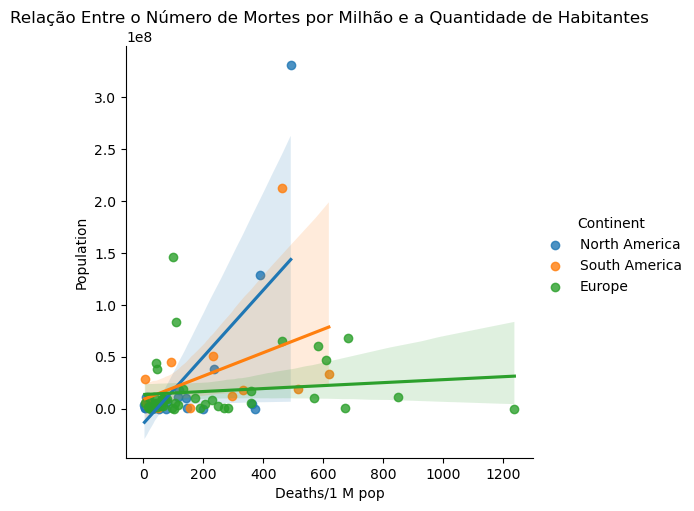

In [46]:
# c. Criar Scatterplot sendo o eixo x mostrando as mortes por milhão, o eixo y, a população total e representar os 3 continentes com cores diferentes;

sns.lmplot(x='Deaths/1M pop', y="Population", hue="Continent", data=top_3_data)

plt.title('Relação Entre o Número de Mortes por Milhão e a Quantidade de Habitantes')
plt.xlabel('Deaths/1 M pop')

plt.show()


Responder as perguntas com base no gráfico.¶

    1 - No canto esquerdo inferior, devido a baixa população de alguns países em conjunto com a escala escolhida pelo seaborn
    2 - Sim, uma fraca correlação positiva
    3 - Sim, para os 3 continentes é possível perceber uma correlação positiva entre população e morte por milhão



# 5.4 - Heatmap de Correlação

### 1. Será utilizado o método DataFrame.corr() do pandas para gerar os valores de correlação, então o aluno deverá produzir um heatmap para a visualização dos valores gerados

In [44]:
# a. Criar uma variável para armazenar os valores de correlação;

world_corr = worldmeter.corr(numeric_only=True)
world_corr

,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop
Population,1.000000,0.546158,0.889610,0.431072,0.910836,0.590239,0.854194,0.459124,0.595379,-0.009337,0.025686,0.497937,-0.075129
TotalCases,0.546158,1.000000,0.999459,0.938622,0.998062,0.985764,0.998258,0.969423,0.967270,0.252627,0.280476,0.891001,0.029141
NewCases,0.889610,0.999459,1.000000,0.991894,0.995554,0.991416,0.999636,0.935500,0.985526,0.321203,0.842468,0.214572,-0.669339
TotalDeaths,0.431072,0.938622,0.991894,1.000000,0.999507,0.935410,0.988362,0.927625,0.906627,0.237206,0.425186,0.850304,0.053870
NewDeaths,0.910836,0.998062,0.995554,0.999507,1.000000,0.998935,0.992651,0.888717,0.997112,0.046499,0.751519,0.039460,-0.803470
TotalRecovered,0.590239,0.985764,0.991416,0.935410,0.998935,1.000000,0.986012,0.914566,0.949628,0.268483,0.296443,0.870113,0.022027
NewRecovered,0.854194,0.998258,0.999636,0.988362,0.992651,0.986012,1.000000,0.937663,0.980595,0.167036,0.825828,-0.081745,-0.869608
ActiveCases,0.459124,0.969423,0.935500,0.927625,0.888717,0.914566,0.937663,1.000000,0.945943,0.212899,0.255001,0.911488,0.028963
"Serious,Critical",0.595379,0.967270,0.985526,0.906627,0.997112,0.949628,0.980595,0.945943,1.000000,0.209668,0.271842,0.859526,0.020649
Tot Cases/1M pop,-0.009337,0.252627,0.321203,0.237206,0.046499,0.268483,0.167036,0.212899,0.209668,1.000000,0.502134,0.194120,0.302728


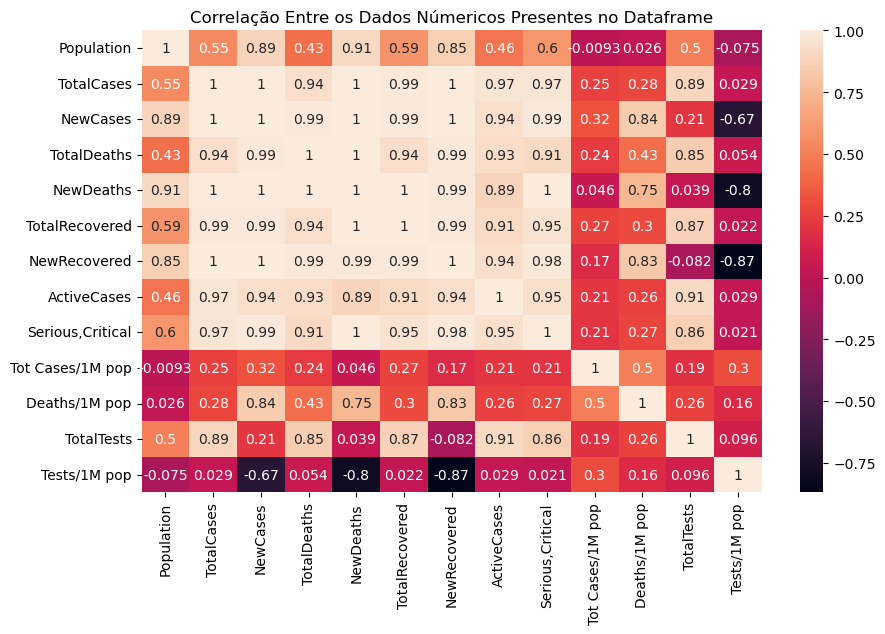

In [45]:
# b. Criar um heatmap, com título, utilizando a variável criada no item anterior;

plt.figure(figsize=(10,6))
plt.title('Correlação Entre os Dados Númericos Presentes no Dataframe')

sns.heatmap(data=world_corr, annot=True)

plt.show()

Escolher duas features para analisar seus valores de correlação (Sugestão: “Population”, “Teste/1M pop”).

Note que, ao analisar a correlação entre a População e a quantidade de testes por milhão de pessoas, notamos uma fraca correlação negativa. Isso significa que, quanto maior a população, menos testes são feitos.